In [20]:
import pandas as pd

df = pd.read_csv('winequality-white.csv')
df.head(3)

quality = df['quality'].values
category = []
for num in quality:
    if num < 7:
        category.append(0)
    else:
        category.append(1)
        
category = pd.DataFrame(data=category, columns=['category'])
data = pd.concat([df, category], axis=1)
data.drop(labels='quality', axis=1, inplace=True)
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0


0    3838
1    1060
Name: category, dtype: int64

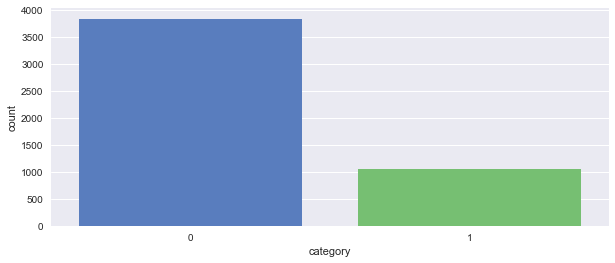

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,4))
sns.countplot(data["category"], palette="muted")
data["category"].value_counts()

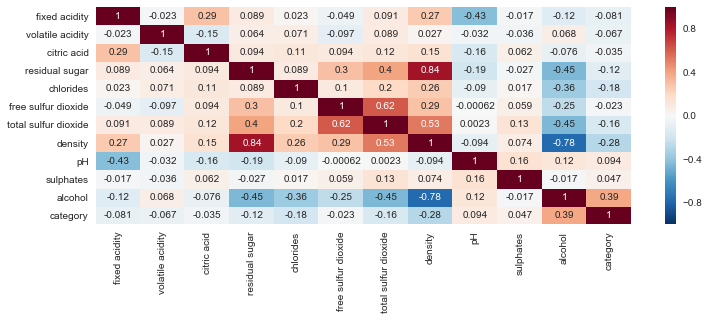

In [22]:
plt.figure(figsize=(12, 4))
sns.heatmap(data.corr(), annot=True)

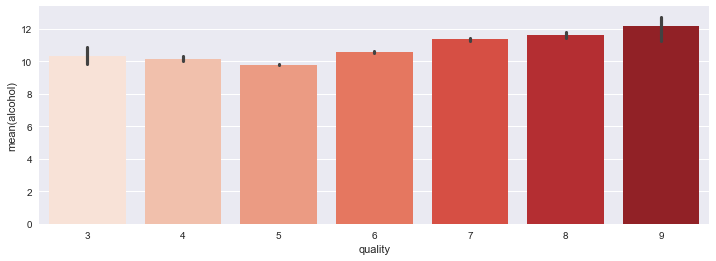

In [23]:
plt.figure(figsize=(12,4))
sns.barplot(x=df["quality"], y=df["alcohol"], palette="Reds")

In [24]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log_reg = log_reg.predict(X_test)

print(classification_report(y_test, pred_log_reg))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88       764
          1       0.58      0.19      0.29       216

avg / total       0.76      0.79      0.75       980



In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200, random_state=0)
random_forest.fit(X_train, y_train)
pred_random_forest = random_forest.predict(X_test)

print(classification_report(y_test, pred_random_forest))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92       764
          1       0.82      0.56      0.67       216

avg / total       0.87      0.88      0.87       980



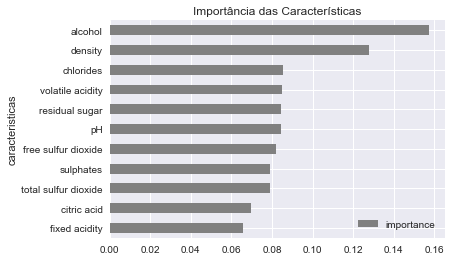

In [27]:
features = data.columns.drop('category')
results = pd.DataFrame({'caracteristicas': features, 'importance': random_forest.feature_importances_})
results = results.sort_values('importance')

plt.figure(figsize=(12, 6))
results.plot(kind='barh', color='gray', x='caracteristicas', y='importance', title='Importância das Características')

In [28]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_boost = AdaBoostClassifier(n_estimators=400, learning_rate=0.01, random_state=0)
ada_boost.fit(X_train, y_train)
pred_ada_boost = ada_boost.predict(X_test)

print(classification_report(y_test, pred_ada_boost))

g_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, random_state=0)
g_boost.fit(X_train, y_train)
pred_g_boost = g_boost.predict(X_test)

print(classification_report(y_test, pred_g_boost))

             precision    recall  f1-score   support

          0       0.79      1.00      0.88       764
          1       0.82      0.04      0.08       216

avg / total       0.79      0.79      0.70       980

             precision    recall  f1-score   support

          0       0.81      0.98      0.89       764
          1       0.75      0.21      0.33       216

avg / total       0.80      0.81      0.77       980



In [30]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_resampled, y_resampled = smt.fit_sample(X, y)
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

g_boost.fit(X_train2, y_train2)
pred_g_boost2 = g_boost.predict(X_test2)
print(classification_report(y_test2, pred_g_boost2))

random_forest.fit(X_train2, y_train2)
pred_random_forest2 = random_forest.predict(X_test2)
print(classification_report(y_test2, pred_random_forest2))

             precision    recall  f1-score   support

          0       0.81      0.75      0.78       753
          1       0.78      0.83      0.80       783

avg / total       0.79      0.79      0.79      1536

             precision    recall  f1-score   support

          0       0.93      0.90      0.92       753
          1       0.91      0.94      0.92       783

avg / total       0.92      0.92      0.92      1536



In [16]:
scores1 = cross_validate(g_boost, X_resampled, y_resampled, cv=5, return_train_score=True)
print(scores1['test_score'].mean())

scores2 = cross_validate(random_forest, X_resampled, y_resampled, cv=5, return_train_score=True)
print(scores2['test_score'].mean())

0.7700310327031724
0.8702260905584529
